# **<span style = 'color:blue'>Customer Churn Prediction 2020</span>**
#### Predict whether a customer will change telco provider

## **<span style = 'color:green'>1. Dataset information</span>**
This dataset is about predicting whether a customer will change telecommunications provider, something known as "churning".

The training dataset contains 4250 samples. Each sample contains 19 features and 1 boolean variable "churn" which indicates the class of the sample. The 19 input features and 1 target variable are:

* "state", string. 2-letter code of the US state of customer residence
* "account_length", numerical. Number of months the customer has been with the current telco provider
* "area_code", string="area_code_AAA" where AAA = 3 digit area code.
* "international_plan", (yes/no). The customer has international plan.
* "voice_mail_plan", (yes/no). The customer has voice mail plan.
* "number_vmail_messages", numerical. Number of voice-mail messages.
* "total_day_minutes", numerical. Total minutes of day calls.
* "total_day_calls", numerical. Total minutes of day calls.
* "total_day_charge", numerical. Total charge of day calls.
* "total_eve_minutes", numerical. Total minutes of evening calls.
* "total_eve_calls", numerical. Total number of evening calls.
* "total_eve_charge", numerical. Total charge of evening calls.
* "total_night_minutes", numerical. Total minutes of night calls.
* "total_night_calls", numerical. Total number of night calls.
* "total_night_charge", numerical. Total charge of night calls.
* "total_intl_minutes", numerical. Total minutes of international calls.
* "total_intl_calls", numerical. Total number of international calls.
* "total_intl_charge", numerical. Total charge of international calls
* "number_customer_service_calls", numerical. Number of calls to customer service
* "churn", (yes/no). Customer churn - target variable.

## **<span style = 'color:green'>2. Import the required libraries</span>**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf

## **<span style = 'color:green'>3. Load the dataset</span>**

In [2]:
df = pd.read_csv('/kaggle/input/customer-churn-prediction-2020/train.csv')
df_test = pd.read_csv('/kaggle/input/customer-churn-prediction-2020/test.csv')
df.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no


## **<span style = 'color:green'>4. Data Exploration</span>**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          4250 non-null   object 
 1   account_length                 4250 non-null   int64  
 2   area_code                      4250 non-null   object 
 3   international_plan             4250 non-null   object 
 4   voice_mail_plan                4250 non-null   object 
 5   number_vmail_messages          4250 non-null   int64  
 6   total_day_minutes              4250 non-null   float64
 7   total_day_calls                4250 non-null   int64  
 8   total_day_charge               4250 non-null   float64
 9   total_eve_minutes              4250 non-null   float64
 10  total_eve_calls                4250 non-null   int64  
 11  total_eve_charge               4250 non-null   float64
 12  total_night_minutes            4250 non-null   f

In [4]:
df_test.isnull().sum()

id                               0
state                            0
account_length                   0
area_code                        0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
dtype: int64

In [5]:
df.describe()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
count,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000
mean,100.236235,7.631765,180.259600,99.907294,30.644682,200.173906,100.176471,17.015012,200.527882,99.839529,9.023892,10.256071,4.426353,2.769654,1.559059
std,39.698401,13.439882,54.012373,19.850817,9.182096,50.249518,19.908591,4.271212,50.353548,20.093220,2.265922,2.760102,2.463069,0.745204,1.311434
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,73.000000,0.000000,143.325000,87.000000,24.365000,165.925000,87.000000,14.102500,167.225000,86.000000,7.522500,8.500000,3.000000,2.300000,1.000000
50%,100.000000,0.000000,180.450000,100.000000,30.680000,200.700000,100.000000,17.060000,200.450000,100.000000,9.020000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,16.000000,216.200000,113.000000,36.750000,233.775000,114.000000,19.867500,234.700000,113.000000,10.560000,12.000000,6.000000,3.240000,2.000000
max,243.000000,52.000000,351.500000,165.000000,59.760000,359.300000,170.000000,30.540000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [6]:
df['state'].nunique()

51

In [7]:
df['state'].unique()

array(['OH', 'NJ', 'OK', 'MA', 'MO', 'LA', 'WV', 'IN', 'RI', 'IA', 'MT',
       'NY', 'ID', 'VA', 'TX', 'FL', 'CO', 'AZ', 'SC', 'WY', 'HI', 'NH',
       'AK', 'GA', 'MD', 'AR', 'WI', 'OR', 'MI', 'DE', 'UT', 'CA', 'SD',
       'NC', 'WA', 'MN', 'NM', 'NV', 'DC', 'VT', 'KY', 'ME', 'MS', 'AL',
       'NE', 'KS', 'TN', 'IL', 'PA', 'CT', 'ND'], dtype=object)

In [8]:
df['area_code'].nunique()

3

In [9]:
df['area_code'].unique()

array(['area_code_415', 'area_code_408', 'area_code_510'], dtype=object)

In [10]:
df['area_code'].value_counts()

area_code_415    2108
area_code_408    1086
area_code_510    1056
Name: area_code, dtype: int64

In [11]:
df['international_plan'].value_counts()

no     3854
yes     396
Name: international_plan, dtype: int64

In [12]:
df['voice_mail_plan'].value_counts()

no     3138
yes    1112
Name: voice_mail_plan, dtype: int64

## **<span style = 'color:green'>4. Data Preprocessing</span>**
### **<span style = 'color:brown'>Label Encoding</span>**

In [13]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
#object_col = [col for col in df.columns if df[col].dtypes == 'object']
#for col in object_col:
for col in [col for col in df.columns if df[col].dtypes == 'object']:
    df[col] = le.fit_transform(df[col].astype(str))
df.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,35,107,1,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
1,31,137,1,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
2,35,84,0,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
3,36,75,1,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
4,19,121,2,0,1,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,0


In [14]:
for col in [col for col in df_test.columns if df_test[col].dtypes == 'object']:
    df_test[col] = le.fit_transform(df_test[col].astype(str))
df_test.head()

,id,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,1,16,128,1,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,2,1,118,2,1,0,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0
2,3,12,62,1,0,0,0,120.7,70,20.52,307.2,76,26.11,203.0,99,9.14,13.1,6,3.54,4
3,4,46,93,2,0,0,0,190.7,114,32.42,218.2,111,18.55,129.6,121,5.83,8.1,3,2.19,3
4,5,29,174,1,0,0,0,124.3,76,21.13,277.1,112,23.55,250.7,115,11.28,15.5,5,4.19,3


In [15]:
df['state'].unique(),  df['area_code'].unique(), df['international_plan'].unique(), df['voice_mail_plan'].unique(), df['churn'].unique()

(array([35, 31, 36, 19, 24, 18, 49, 15, 39, 12, 26, 34, 13, 45, 43,  9,  5,
         3, 40, 50, 11, 30,  0, 10, 20,  2, 48, 37, 22,  8, 44,  4, 41, 27,
        47, 23, 32, 33,  7, 46, 17, 21, 25,  1, 29, 16, 42, 14, 38,  6, 28]),
 array([1, 0, 2]),
 array([0, 1]),
 array([1, 0]),
 array([0, 1]))

### **<span style = 'color:brown'>Splitting the dataset into the Training set and Test set</span>**

In [16]:
X = df.drop('churn', axis = 1)
y = df['churn']
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.30)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Val set:', X_val.shape,  y_val.shape)

Train set: (2975, 19) (2975,)
Val set: (1275, 19) (1275,)


### **<span style = 'color:brown'>Feature Scaling</span>**

In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(df_test.drop('id', axis = 1))

## **<span style = 'color:green'>Model Development & Evaluation</span>**

In [18]:
# 1. Define Model
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
model = Sequential()
model.add(Dense(units=11, input_shape = (X.shape[1],), activation='relu', kernel_initializer = 'he_normal'))
model.add(Dense(units = 10, activation = 'relu', kernel_initializer = 'he_normal'))
model.add(Dropout(0.3))
model.add(Dense(units = 10, activation = 'relu', kernel_initializer = 'he_normal'))
model.add(Dropout(0.3))
model.add(Dense(units = 1, activation = 'sigmoid'))

# 2. Compile Model
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# 3. Fit Model
history = model.fit(X_train, y_train, epochs = 100, batch_size = 25, verbose = 1, validation_data=(X_val, y_val))

# 4. Evaluate Model
loss, acc = model.evaluate(X_val, y_val)
print('Accuracy of model is : %.3f' %acc)

2022-12-12 15:37:15.831496: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.
2022-12-12 15:37:16.048040: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/100
119/119 [==============================] - 1s 5ms/step - loss: 0.6118 - accuracy: 0.7916 - val_loss: 0.4701 - val_accuracy: 0.8635
Epoch 2/100
119/119 [==============================] - 0s 3ms/step - loss: 0.4900 - accuracy: 0.8407 - val_loss: 0.4315 - val_accuracy: 0.8635
Epoch 3/100
119/119 [==============================] - 0s 3ms/step - loss: 0.4495 - accuracy: 0.8497 - val_loss: 0.4084 - val_accuracy: 0.8635
Epoch 4/100
119/119 [==============================] - 0s 3ms/step - loss: 0.4331 - accuracy: 0.8538 - val_loss: 0.3945 - val_accuracy: 0.8635
Epoch 5/100
119/119 [==============================] - 0s 3ms/step - loss: 0.4076 - accuracy: 0.8545 - val_loss: 0.3821 - val_accuracy: 0.8635
Epoch 6/100
119/119 [==============================] - 0s 4ms/step - loss: 0.3952 - accuracy: 0.8551 - val_loss: 0.3743 - val_accuracy: 0.8635
Epoch 7/100
119/119 [==============================] - 0s 3ms/step - loss: 0.3706 - accuracy: 0.8568 - val_loss: 0.3657 - val_accuracy: 0.8635

<AxesSubplot:title={'center':'Accuracy'}>

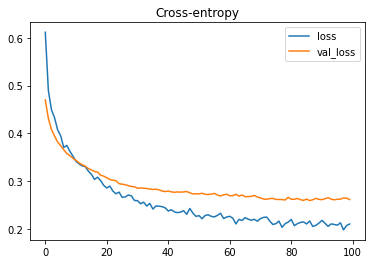

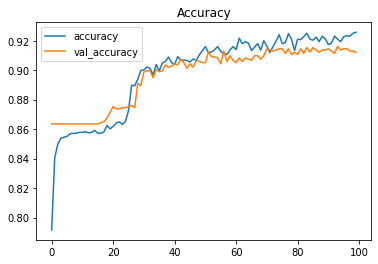

In [19]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss','val_loss']].plot(title="Cross-entropy")
history_df.loc[:, ['accuracy', 'val_accuracy']].plot(title="Accuracy")

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 11)                220       
_________________________________________________________________
dense_1 (Dense)              (None, 10)                120       
_________________________________________________________________
dropout (Dropout)            (None, 10)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                110       
_________________________________________________________________
dropout_1 (Dropout)          (None, 10)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 11        
Total params: 461
Trainable params: 461
Non-trainable params: 0
__________________________________________________________

## **<span style = 'color:green'>Model Prediction</span>**

In [21]:
pd.read_csv('/kaggle/input/customer-churn-prediction-2020/sampleSubmission.csv').head()

,id,churn
0,1,yes
1,2,no
2,3,no
3,4,yes
4,5,yes


In [22]:
predictions = (model.predict(X_test)).astype("int32")
test_preds = predictions.reshape(len(df_test),)
test_ids = df_test['id']
df_pred = pd.DataFrame({'id': df_test['id'], 'churn': test_preds})
df_pred['churn'] = le.inverse_transform(df_pred['churn'])
df_pred[df_pred['churn']=='yes']

,id,churn
